In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [3]:
n=100
teta=20 #некоторое значение параметра 
x = np.random.uniform(teta,2*teta,n)
x = x.round(3)
beta=0.95
#print(x)

In [4]:
#d) Точный доверительный интервал 

In [5]:
t_1,t_2=x.max()/(1+(beta)**(1/n)), x.max()/(1+(1-beta)**(1/n))
print("(t1,t2)", "(" ,round(t_1,3),",", round(t_2,3), ")")

(t1,t2) ( 19.986 , 20.28 )


In [6]:
#e) Асимптотический доверительный интервал 

In [7]:
#ОММ

In [8]:
beg= 2 * np.sqrt(3*n) * np.mean(x) / (1.96 + 3*np.sqrt(3*n))
end = 2 * np.sqrt(3*n) * np.mean(x) / (-1.96+ 3*np.sqrt(3*n))
print('Доверительный интервал по ОММ (', round(beg,3), ', ', round(end, 3), ')')

Доверительный интервал по ОММ ( 19.035 ,  20.527 )


In [190]:
#ОМП

In [9]:
s = ((n+1) * np.max(x)) / ((2*n+1)*(1.96/np.sqrt(n) + 1))
f= ((n+1) * np.max(x)) / ((2*n+1)*(-1.96/np.sqrt(n) + 1))
print('Доверительный интервал по ОМП (', round(s,3), ', ', round(f, 3), ')')

Доверительный интервал по ОМП ( 16.79 ,  24.976 )


In [10]:
# g) Bootstrap

In [11]:
delta = np.array([])
teta_ = 2/3*x.mean()
for i in range(0,1000):
    bootstrap = np.random.choice(x, size=x.shape[0]).round(3) 
    delta = np.append(delta, 2/3*bootstrap.mean() - teta_)
delta.sort() #вар ряд
b1,b2= teta_ - delta[974], teta_ - delta[24]
print('Бутстраповский доверительный интервал (', round(b1,3), ', ', round(b2, 3), ')')

Бутстраповский доверительный интервал ( 18.919 ,  20.581 )


In [12]:
# h) Сравнение интервалов

l_bootstrap 1.662
l_Асимптотический ОМП 8.186
l_Асимптотический ОММ 1.492
l_точный 0.294
l_min точный 0.294


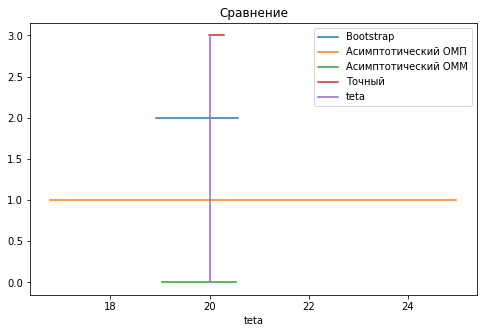

In [25]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot([b1, b2], [2, 2], label = 'Bootstrap')
ax.plot([s,f], [1, 1], label = 'Асимптотический ОМП')
ax.plot([beg, end], [0, 0], label = 'Асимптотический OММ')
ax.plot([t_1, t_2], [3, 3], label = 'Точный')
ax.plot([teta, teta], [0,3], label = 'teta')
ax.set_title('Сравнение')    
ax.set_xlabel('teta')
ax.legend();

a_b=b2-b1
print("l_bootstrap", a_b.round(3))
a_p=f-s
print("l_Асимптотический ОМП", a_p.round(3))
a_m=end-beg
print("l_Асимптотический ОММ", a_m.round(3))
a_t=t_2-t_1
print("l_точный", a_t.round(3))
a=[a_b,a_p,a_m,a_t]
t=(min(a))

for i in range(0,4):
    if (a[i]==t):
        if i==0:
            print("l_min bootstrap",t.round(3))
        if i==1:
            print("l_min Асимптотический ОМП",t.round(3))
        if i==2:
            print("l_min Асимптотический ОМM",t.round(3))
        if i==3:
            print("l_min точный",t.round(3))
        
#print(a)